<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px">

## Modeling means of timeseries, autocorrelation and partial autocorrelation 

Week 9 | Lesson 2.1.2

---

We will be loading the Rossman store data to practice more timeseries plotting, look at different ways of modeling the mean (or median, etc.) of timeseries, and learn about the autocorrelation and partial autocorrelation.

The autocorrelation and partial autocorrelation are essential to understanding the ARIMA models we will cover tomorrow.

---

---

**Load the rossman store data, then convert the date to datetime format and make it the index of the DataFrame:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import prettyplotlib as ppl

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
data = pd.read_csv('../../assets/datasets/rossmann.csv', skipinitialspace=True)

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [5]:
data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [6]:
data.columns = ['store','day_of_week','date','sales','customers','open','promo','state_holiday','school_holiday']

In [7]:
data.day_of_week.unique()

array([5, 4, 3, 2, 1, 7, 6])

In [8]:
data.date = pd.to_datetime(data.date)

In [9]:
data.set_index('date', inplace=True)

data['year'] = data.index.year
data['month'] = data.index.month

In [10]:
data.head(3)

,store,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,year,month
date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-31,2,5,6064,625,1,1,0,1,2015,7
2015-07-31,3,5,8314,821,1,1,0,1,2015,7


In [11]:
stores = data[data.store.isin([1,4,9])]

In [12]:
print data.shape, stores.shape

(1017209, 10) (2826, 10)


---

**Plot a seaborn factorplot `kind='box'` for stores 1, 4, and 9 with the x-axis the day of the week and the y-axis the sales:**

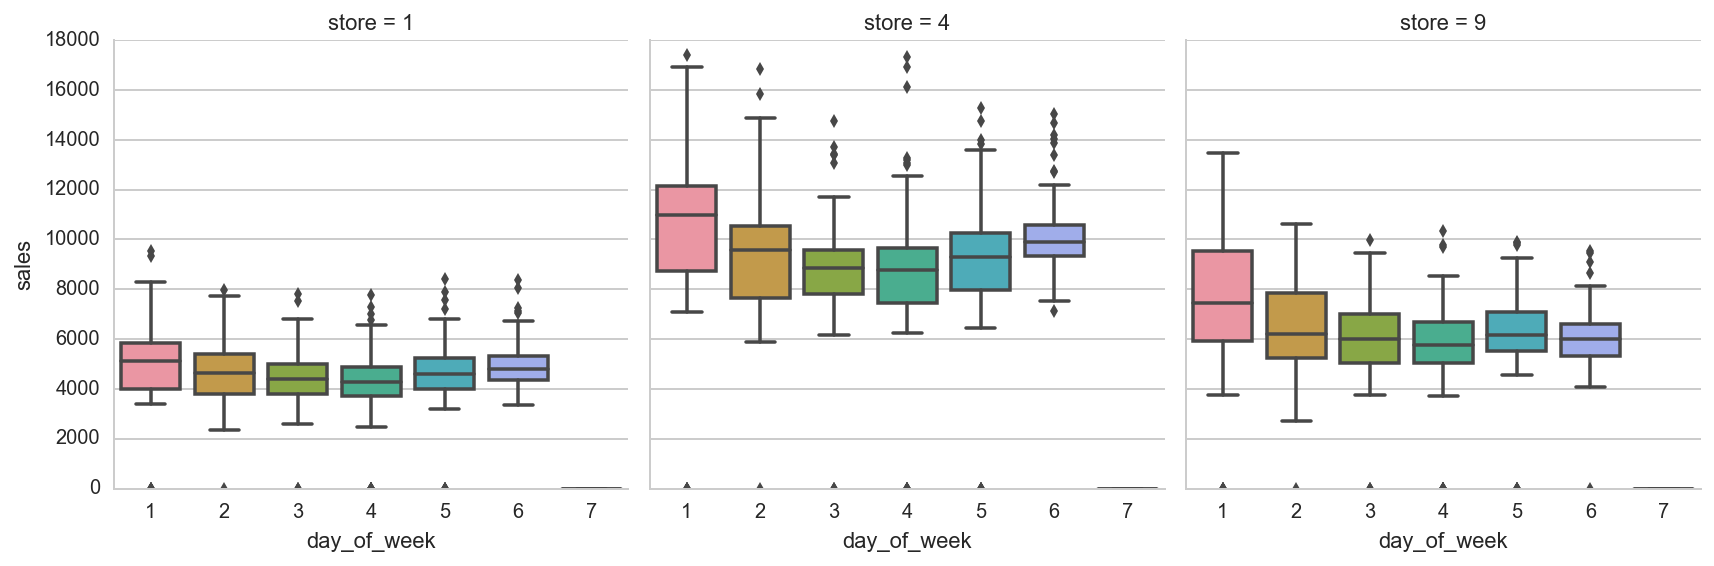

In [13]:
sns.factorplot(x='day_of_week', y='sales',col='store', kind='box', 
               data=stores)

---

**Plot the sales and customer timeseries for store 1 when open:**

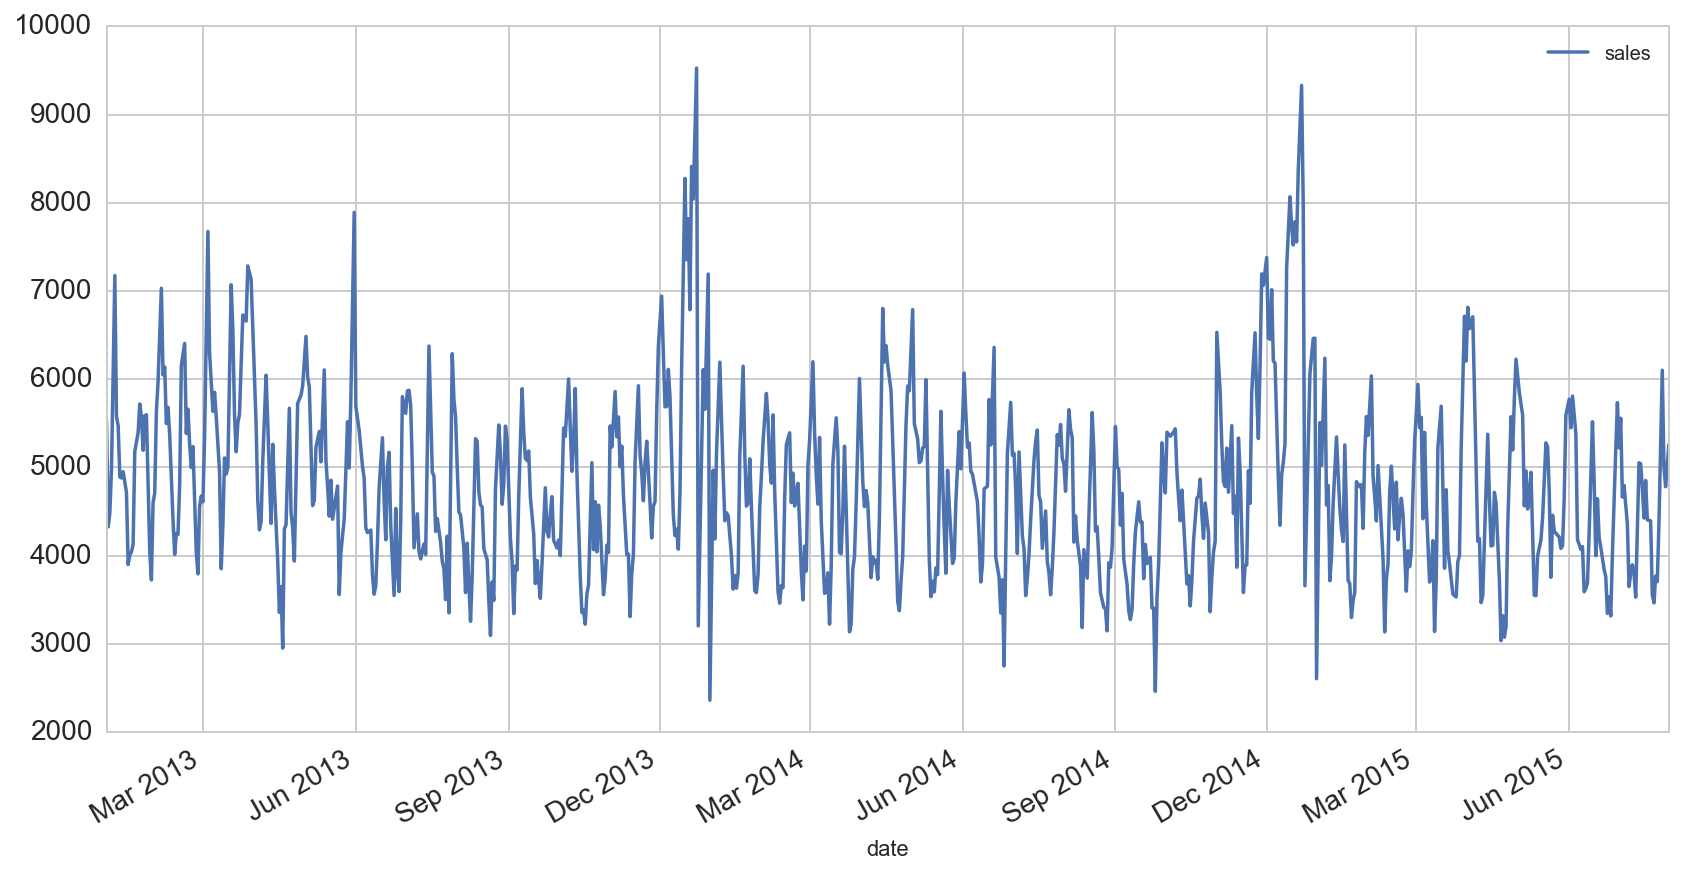

In [14]:
# Filter to days store 1 was open
store1_open_data = stores[(stores.open == 1) & (stores.store == 1)]
store1_open_data[['sales']].plot(figsize=(14,7), fontsize=14)

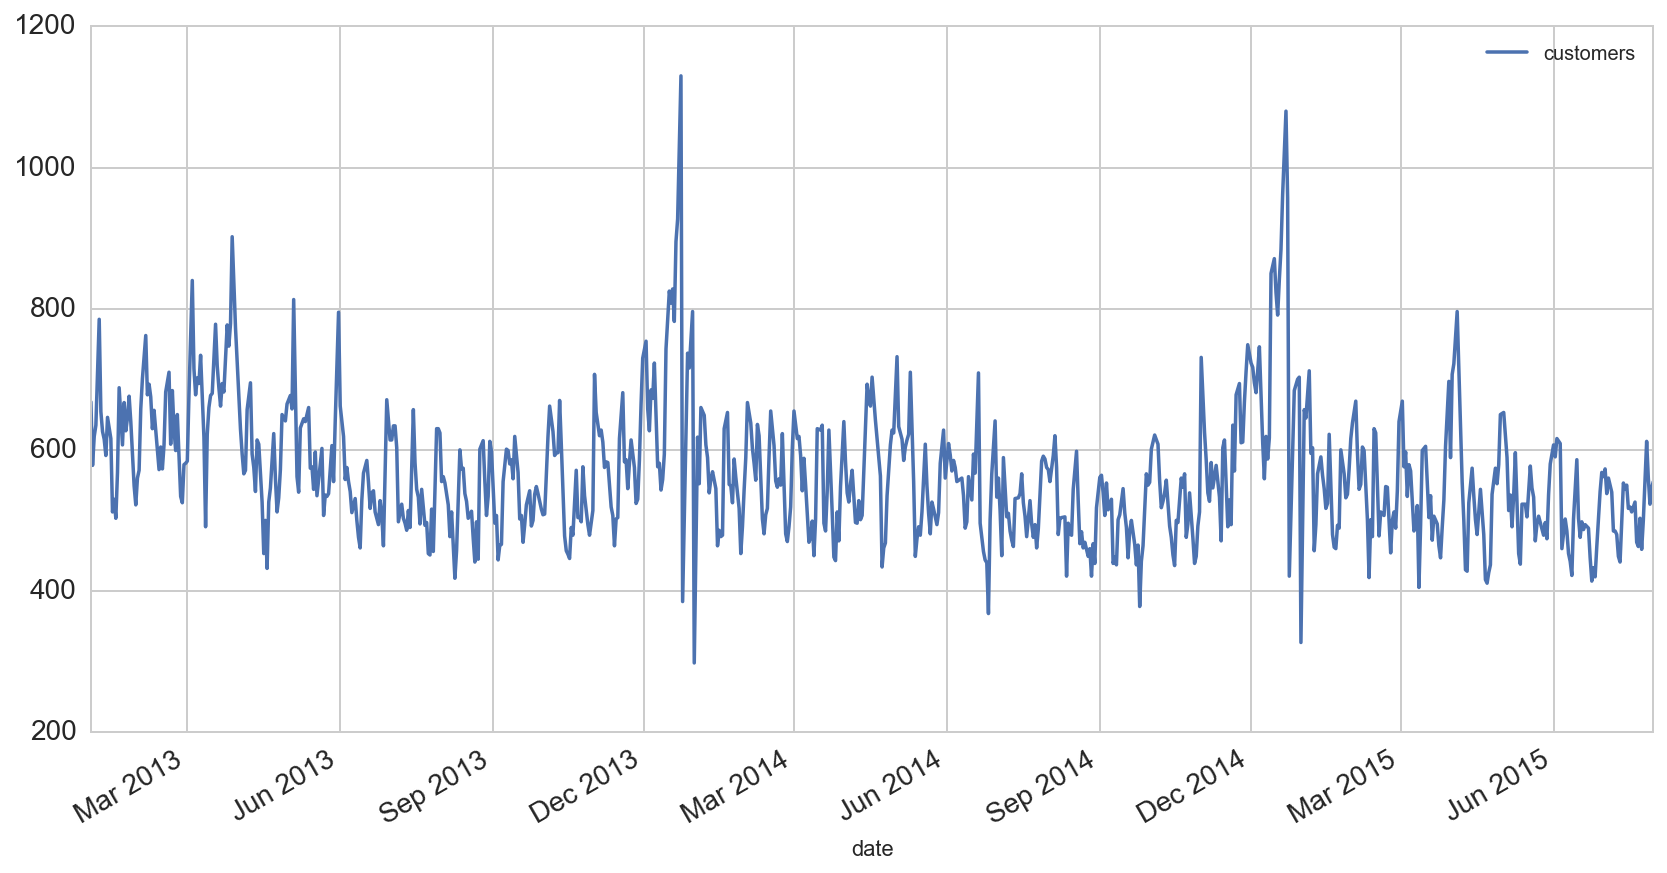

In [15]:
store1_open_data[['customers']].plot(figsize=(14,7), fontsize=14)

---

**Plot the customer timeseries for store 1 and 4 (when open):**

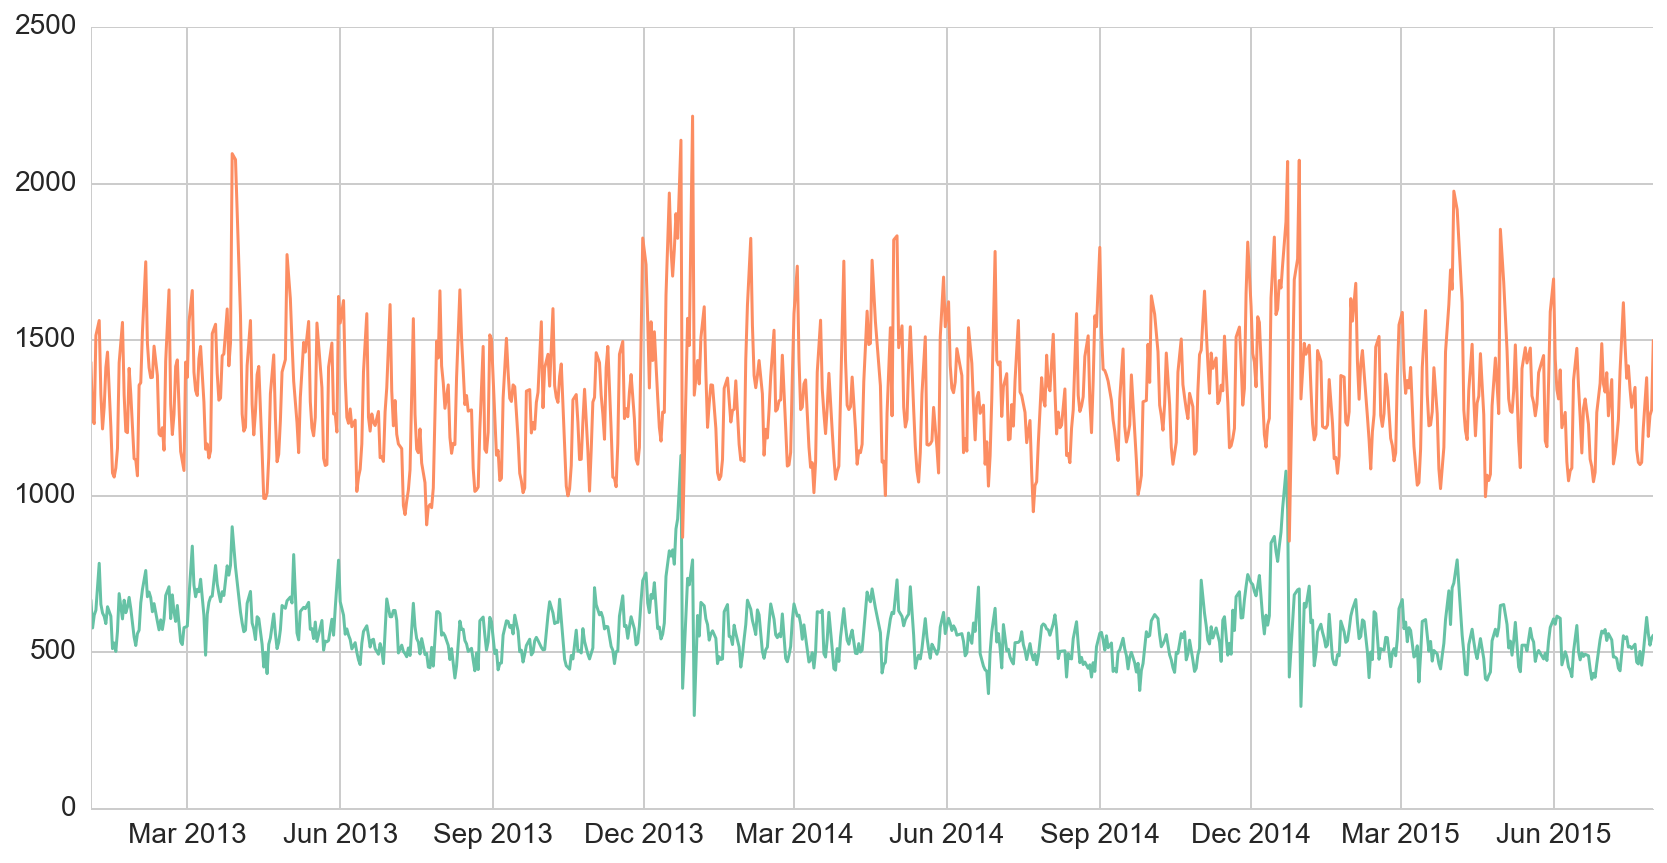

In [18]:
store1_mask = (stores.store == 1) & (stores.open == 1)
store4_mask = (stores.store == 4) & (stores.open == 1)

date_ticks1 = stores[store1_mask].index.to_pydatetime()
date_ticks4 = stores[store4_mask].index.to_pydatetime()

plt.figure(figsize=(14,7))

ppl.plot(date_ticks1, stores[store1_mask]['customers'], alpha=1, lw=1.5)
ppl.plot(date_ticks4, stores[store4_mask]['customers'], alpha=1, lw=1.5)

plt.tick_params(labelsize=14)

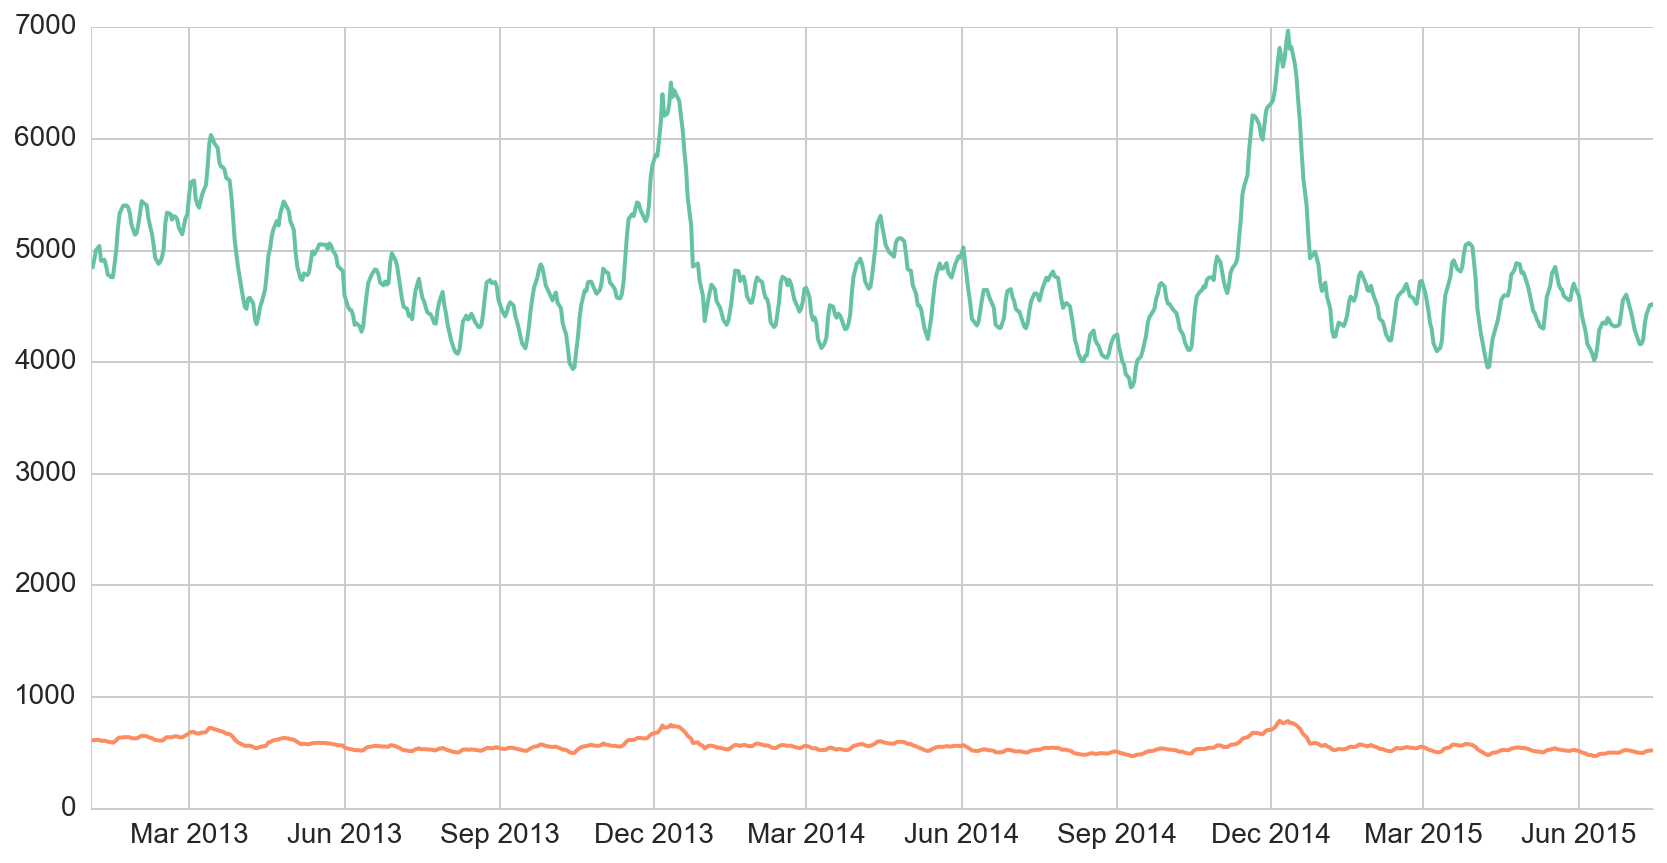

In [25]:
s1_sales_rollmean = stores[store1_mask]['sales'].rolling(window=15).mean()
s1_cust_rollmean = stores[store1_mask]['customers'].rolling(window=15).mean()

plt.figure(figsize=(14,7))

ppl.plot(date_ticks1, s1_sales_rollmean, alpha=1, lw=2)
ppl.plot(date_ticks1, s1_cust_rollmean, alpha=1, lw=2)

plt.tick_params(labelsize=14)

http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.resample.html

---

### Autocorrelation

The "autocorrelation" with a specified period and lag is the correlation between the current timepoint and the timepoint prior defined by the period (day, week, month, etc.) the specified lag prior.

---

**Calculate the autocorrelation for store 1 sales (when open) for day and week periods with lag 1:

In [69]:
s1 = data[(data.store == 1) & (data.open == 1)]
s1.sort_index(ascending=True, inplace=True)

autocorr_day_lag1 = s1['sales'].resample('D').mean().autocorr(lag=1)
autocorr_week_lag1 = s1['sales'].resample('W').mean().autocorr(lag=1)

print autocorr_day_lag1
print autocorr_week_lag1

0.744897317238
-0.0031922367977


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


---

### Rolling mean and rolling median

The "rolling mean" or median takes a specified lag and uses the current time point and time points prior up to the specified lag to calculate the statistic.

---

**Calculate the monthly rolling mean and median for all sales:**

In [70]:
data[['sales']].resample('M').apply([np.median, np.mean]).head()

sales             
            median         mean
date                           
2013-01-31  5194.0  5211.555578
2013-02-28  5421.5  5494.371397
2013-03-31  5844.0  5820.349168
2013-04-30  5464.0  5483.749836
2013-05-31  5585.0  5364.127383

---

**`rolling().mean()`** (as well as **`rolling().median()`**) takes these important parameters:

- the first is the series to aggregate
- **`window`** is the number of days to include in the average
- **`center`** is whether the window should be centered on the date or use data prior to that date
- **`freq`** is on what level to roll-up the averages to (as used in **`resample`**). Either **`D`** for day, **`M`** for month or **`A`** for year, etc.



---

**Calculate the weekly rolling mean of sales for store 1 in 2014, using a weekly time period with an order 2 window:**

In [71]:
# Resample to have the daily average over all stores
s1_2014 = s1[(s1.year == 2014)]

weekly_store_sales = s1_2014[['sales']].resample('W').sum().rolling(window=2, center=True).median()

weekly_store_sales.head()

,sales
date,
2014-01-05,NaN
2014-01-12,22166.0
2014-01-19,26977.0
2014-01-26,27028.0
2014-02-02,27910.0


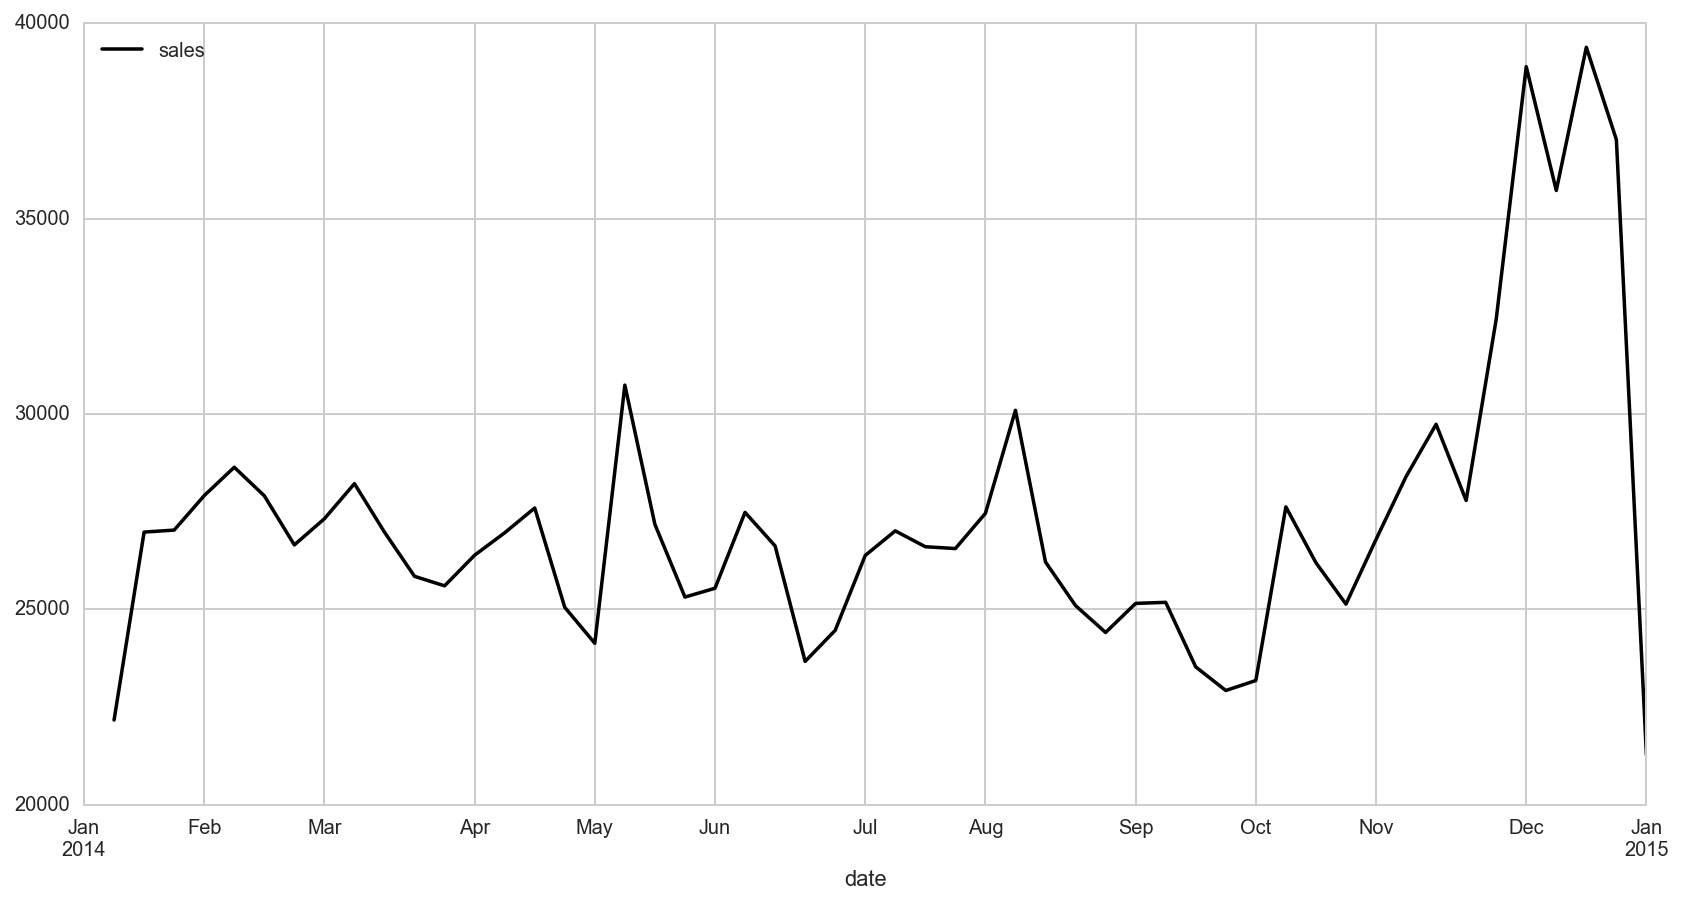

In [74]:
s1_2014[['sales']].resample('W').sum().rolling(window=2, center=True).median().plot(style='k', figsize=(14,7))

---

### Expanding mean vs rolling mean

The "expanding mean" simply uses all datapoints up to the current time to calculate the mean.

---

**Plot the rolling mean and the expanded mean for store 1 sales in year 2014:**

In [75]:
date_ticks = s1_2014.resample('W').index.to_pydatetime()

rolling_mean = s1_2014[['sales']].resample('W').sum().rolling(window=3, center=True).mean()
expanding_mean = s1_2014[['sales']].resample('W').sum().expanding().mean()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


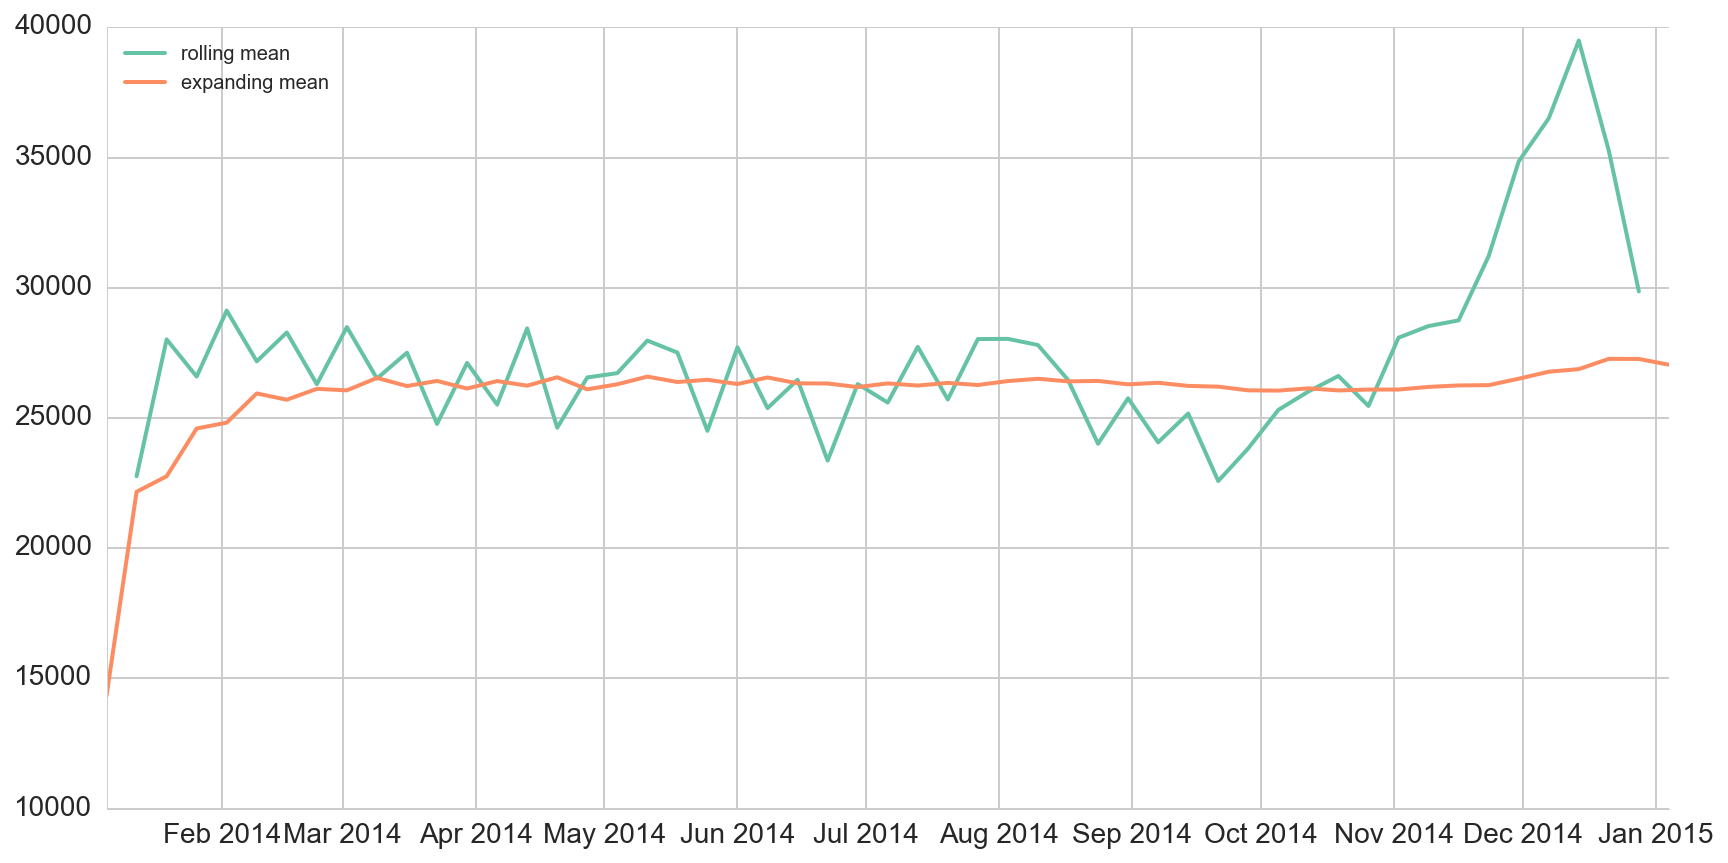

In [76]:
plt.figure(figsize=(14,7))

ppl.plot(date_ticks, rolling_mean, alpha=1, lw=2, label='rolling mean')
ppl.plot(date_ticks, expanding_mean, alpha=1, lw=2, label='expanding mean')

plt.legend(loc='upper left')

plt.tick_params(labelsize=14)

---

### Exponentially weighted windows

http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows

---

Exponentially weighted windows are one of the most common and effective ways of modeling timeseries data. There is an "exponential decay" on the contribution of prior means, making each subsequent previous mean have less of a contribution to the currently modeled mean.

The (adjusted) exponentially weighted mean for time $t$ is defined as:

### $$ x_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2x_{t-1} + ... + (1 - \alpha)^{t}x_0} {1 + (1 - \alpha) + (1 - \alpha)^2 + ... + (1 - \alpha)^{t}} $$


---

**Plot the rolling, expanded, and exponentially weighted mean of sales data, as well as the actual sales, for the winter months of store 1 sales in 2014:**

In [89]:
s1_winter14 = s1_2014[s1_2014.month > 9]

rolling_mean = s1_winter14[['sales']].resample('D').sum().rolling(window=2, center=True).mean()
expanding_mean = s1_winter14[['sales']].resample('D').sum().expanding().mean()
exp_weighted_mean = s1_winter14[['sales']].resample('D').sum().ewm(span=5).mean()


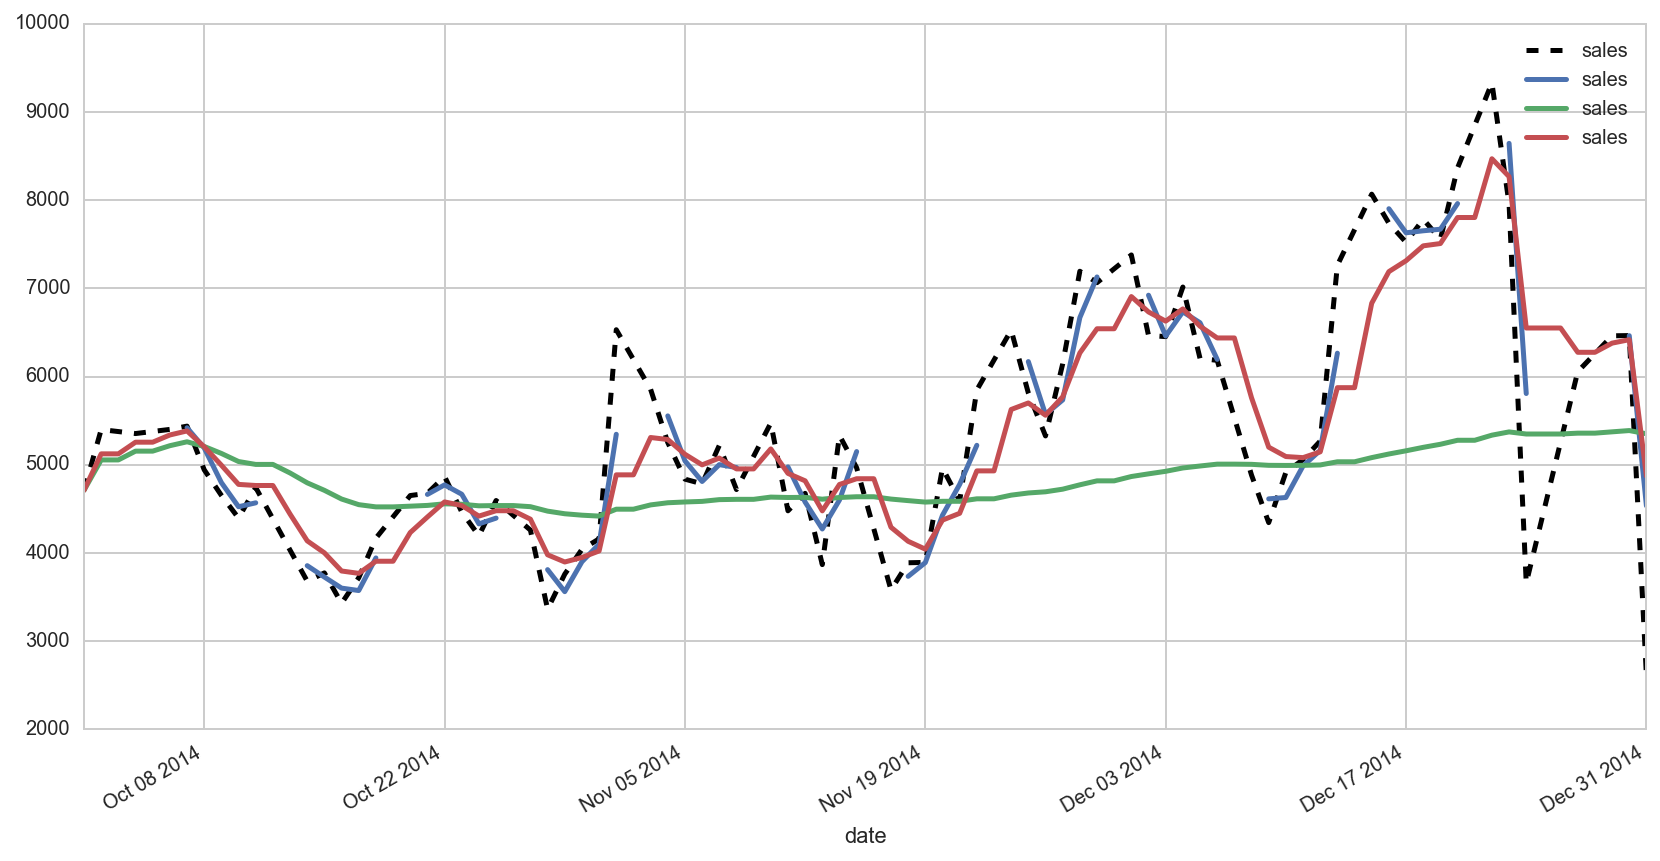

In [90]:
ax = s1_winter14[['sales']].plot(figsize=(14, 7), style='k--', lw=2.5)
rolling_mean.plot(ax=ax, lw=2.5)
expanding_mean.plot(ax=ax, lw=2.5)
exp_weighted_mean.plot(ax=ax, lw=2.5)

---

### Pandas.diff() function

Another common function is is **`.diff()`**, which takes the difference over time. **`df.diff()`** takes one arugment, `periods`, which is how many prior rows to use for the difference.

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.diff.html

---

** Calculate the order 1 and order 2 differences for store 1 sales:**

In [58]:
s1['sales'].head(10)

date
2013-01-01       0
2013-01-02    5530
2013-01-03    4327
2013-01-04    4486
2013-01-05    4997
2013-01-06       0
2013-01-07    7176
2013-01-08    5580
2013-01-09    5471
2013-01-10    4892
Name: sales, dtype: int64

In [54]:
s1['sales'].diff(periods=1).head(10)

date
2013-01-01       NaN
2013-01-02    5530.0
2013-01-03   -1203.0
2013-01-04     159.0
2013-01-05     511.0
2013-01-06   -4997.0
2013-01-07    7176.0
2013-01-08   -1596.0
2013-01-09    -109.0
2013-01-10    -579.0
Name: sales, dtype: float64

In [56]:
s1['sales'].diff(periods=2).head(10)

date
2013-01-01       NaN
2013-01-02       NaN
2013-01-03    4327.0
2013-01-04   -1044.0
2013-01-05     670.0
2013-01-06   -4486.0
2013-01-07    2179.0
2013-01-08    5580.0
2013-01-09   -1705.0
2013-01-10    -688.0
Name: sales, dtype: float64

---

## Autocorrelation revisited: acf and pacf

http://www.itl.nist.gov/div898/handbook/eda/section3/eda35c.htm

http://www.ltrr.arizona.edu/~dmeko/notes_3.pdf

https://onlinecourses.science.psu.edu/stat510/node/62


---

### Autocorrelation and the autocorrelation function (acf)

Autocorrelation, also known as *serial correlation* and *lagged correlation*, is the correlation of a time series with iteself at different lags.

Examples of autocorrelation:

    In stock market data the stock price at one point is correlated with the stock 
    price of the point directly prior in time. 
    
    In sales data (like we have seen), sales on a Saturday are likely correlated with 
    sales on the next Saturday and the previous Saturday, as well as other days to more
    or less extent.
    
Autocorrelation in data is something that breaks the assumptions of linear regression, which is why using regression on time series data is typically inappropriate.

Below is the formula for the autocorrelation funtion (acf):

$\text{Given measurements } x_1, x_2, x_3 ... x_n \text{ at time points } t_1, t_2, t_3 ... t_n:$

### $$lag_k\;acf() = \frac{\sum_{i=1}^{n-k}\left(\left(\;x_i - \bar{x}\;\right)\left(\;x_{i+k} - \bar{x}\;\right)\right)}{\sum_{i=1}^n\left(\;x_i - \bar{x}\;\right)^2}$$

Compare this to the formula for correlation:

$\text{Given measurements } x_1, x_2, x_3 ... x_n \text{ aand measurements } y_1, y_2, y_3 ... y_n:$

### $$r_{xy} = \frac{\sum_{i=1}^{n-k}\left(\left(\;x_i - \bar{x}\;\right)\left(\;y_{i} - \bar{y}\;\right)\right)}{\sqrt{\left(\sum_{i=1}^{n}\left(\;x_i - \bar{x}\;\right)^2\sum_{i=1}^n\left(\;y_i - \bar{y}\;\right)^2\right)}}$$

---

**Calculate the autocorrelation for store 1:**

In [102]:
s1 = data[(data.store == 1)]
s1.sort_index(ascending=True, inplace=True)

s1_autocorrelations = [s1.sales.autocorr(lag=l) for l in range(1,31)]
s1_autocorrelations[0:7]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


[-0.12732514339140222,
 -0.034787155707947,
 0.064736112912999966,
 -0.0018114479109864173,
 -0.10945793528897305,
 -0.22963935576549291,
 0.63071924328402906]

---

**Plot the autocorrelation for store 1:**

In [103]:
s1autocorr = pd.DataFrame({'lag':range(1,31),
                           'autocorrelation':s1_autocorrelations})

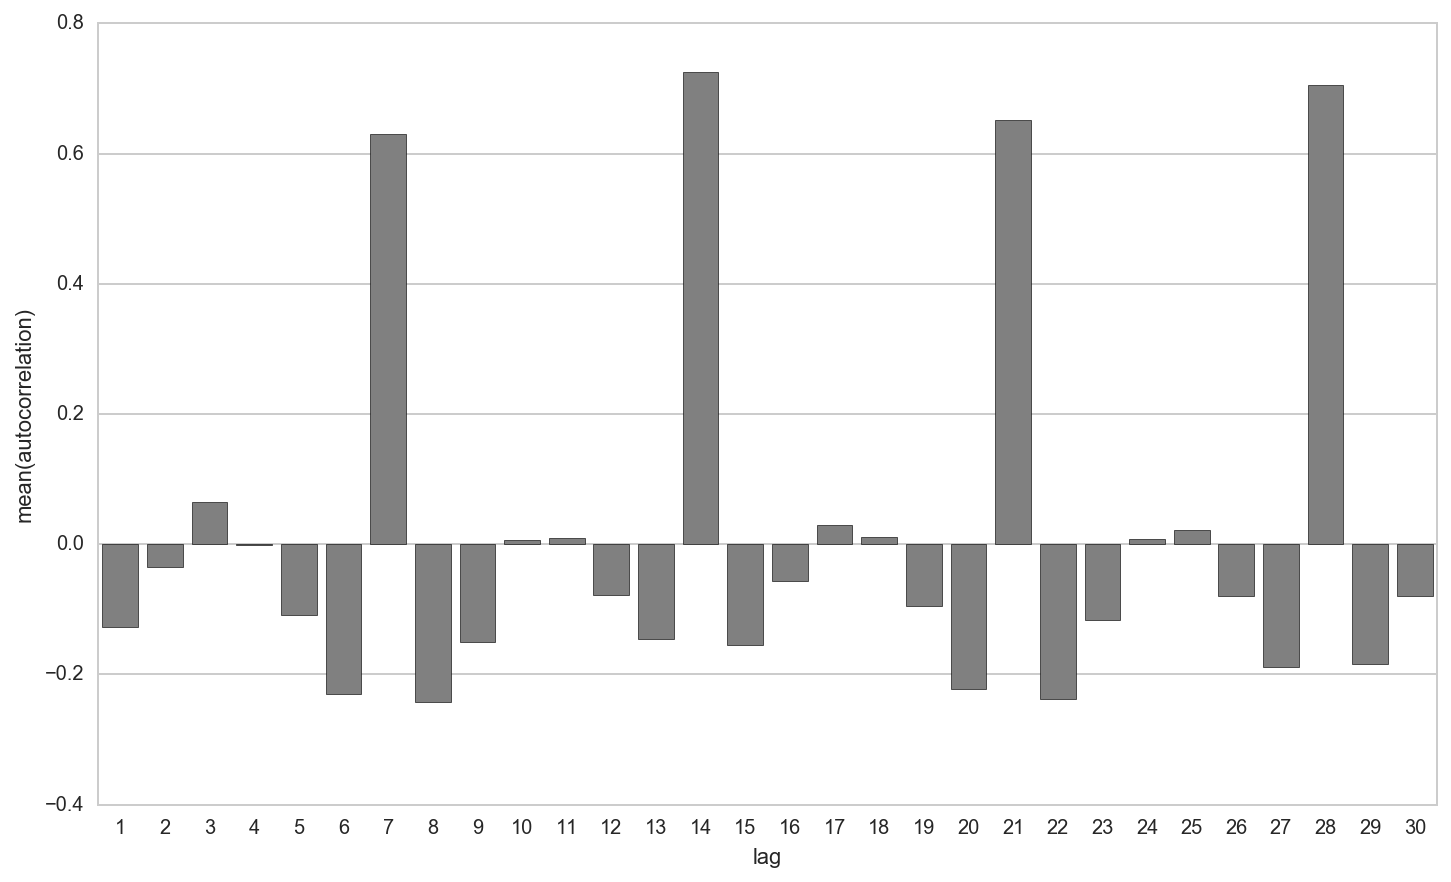

In [104]:
plt.figure(figsize=(12,7))

sns.barplot(x=s1autocorr.lag, y=s1autocorr.autocorrelation, color='grey')

---

**Calculate and plot the autocorrelation for store 1 only for days when it is open:**

In [105]:
s1 = data[(data.store == 1) & (data.open == 1)]
s1.sort_index(ascending=True, inplace=True)

s1_autocorrelations = [s1.sales.autocorr(lag=l) for l in range(1,31)]
s1_autocorrelations[0:7]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


[0.68269082422794292,
 0.4812172661460728,
 0.26970919391548692,
 0.19863334626936219,
 0.014677778664331294,
 -0.030520979086166765,
 -0.057119871365899848]

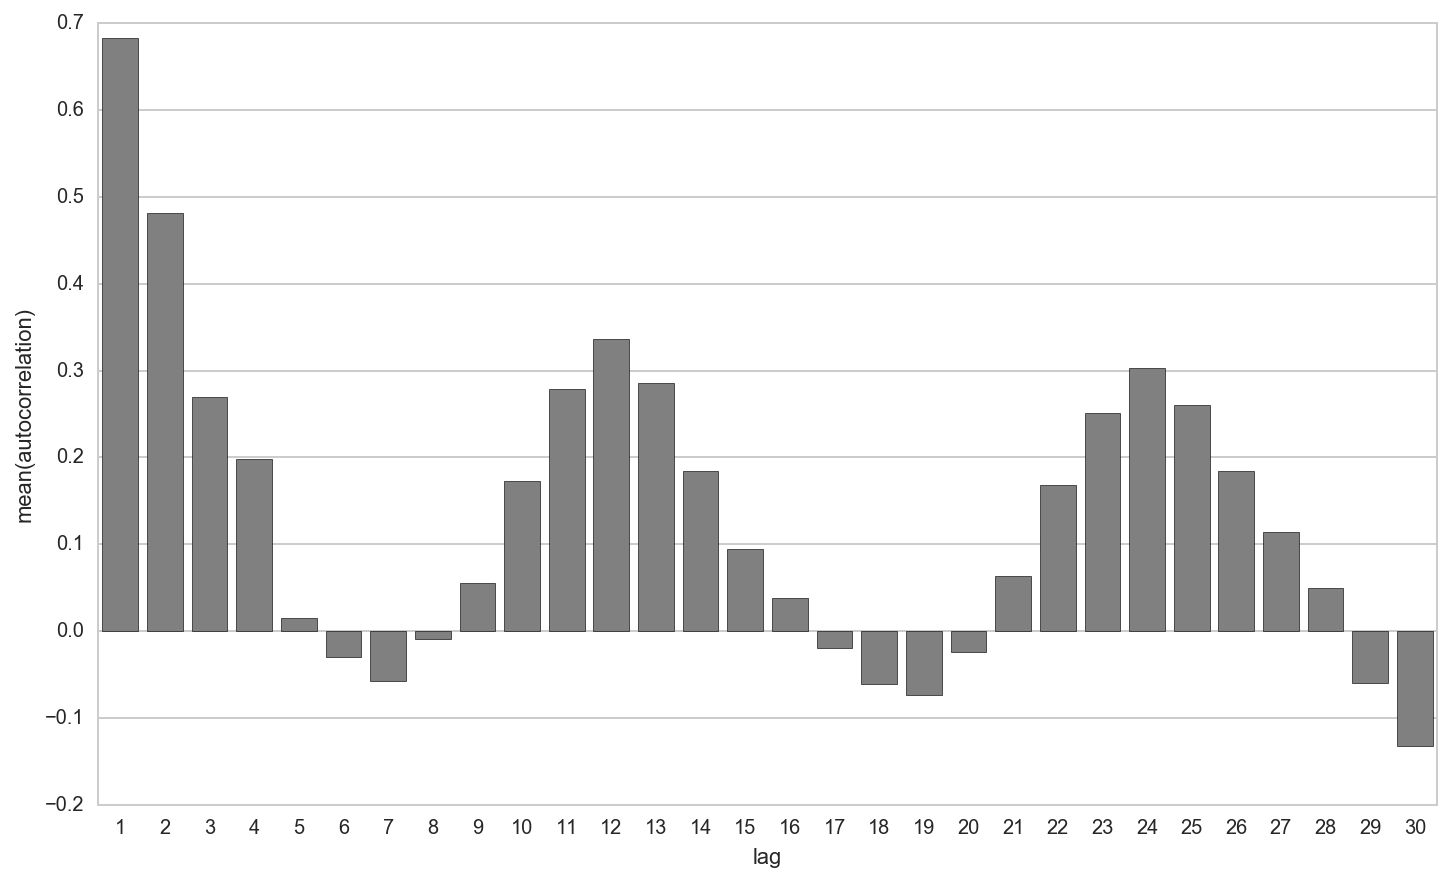

In [106]:
s1autocorr = pd.DataFrame({'lag':range(1,31),
                           'autocorrelation':s1_autocorrelations})
plt.figure(figsize=(12,7))
sns.barplot(x=s1autocorr.lag, y=s1autocorr.autocorrelation, color='grey')

---

### Partial autocorrelation and partial autocorrelation function (pacf)

The partial autocorrelation function (pacf) is similar to the acf; the difference is that the correlations between other lagged timepoints are "regressed out" of the correlation for a given lag. Put another way, this is a *conditional correlation*.

An intuitive way to think about this is in the context of regression. For a pacf with lag = 2 take two regressions:

### $$lm_{t-1} = x_{t} \sim \beta_0 + \beta_1x_{t-1}$$

### $$lm_{t-2} = x_{t} \sim \beta_0 + \beta_1x_{t-1} + \beta_2x_{t-2}$$

Then to find the $pacf(\;x_{t-2}\;)$ we find **the increase in the variance explained by the second regression over the first one**.

More formally, the $pacf$ is defined as:

### $$ pacf \left( x_{t-n} \right) = \frac{covariance \left( x_{t}, \; x_{t-n} \; | \; x_{t-1} ... x_{t-n-1} \right)} {\sqrt {\;  variance \left( x_{t} \ ;| \; x_{t-1} ... x_{t-n-1} \right) variance \left( x_{t-n} \; | \; x_{t-1} ... x_{t-n-1} \right) \; } }$$

---

We will load and use the $pacf()$ and $acf()$ functions from statsmodels as well as their plotting functions:

In [107]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

---

** Calculate and plot the partial autocorrelation and the autocorrelation again using the statsmodels functions:**

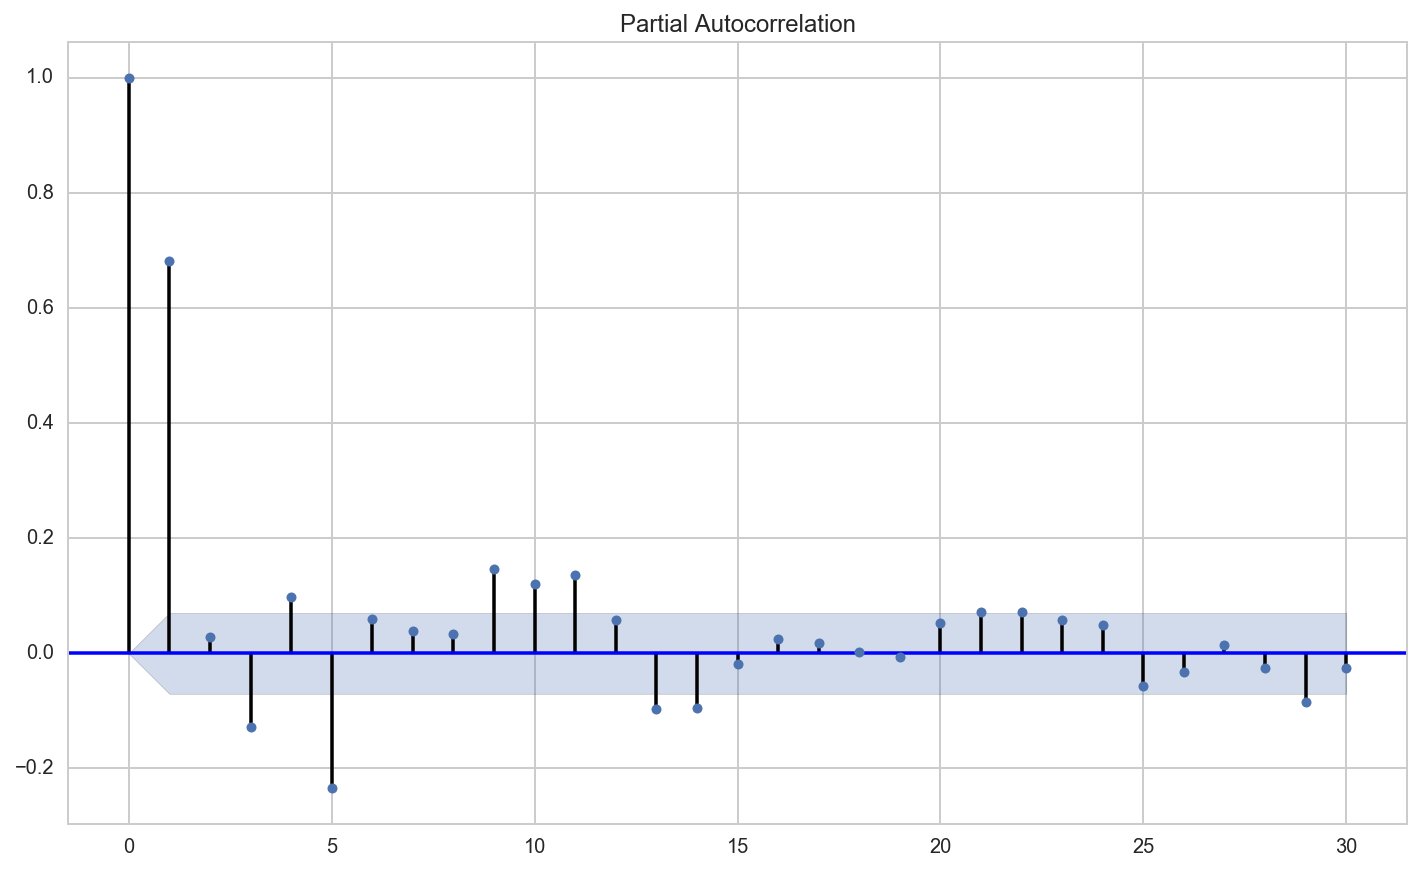

In [113]:
fig = plt.figure(figsize=(12,7))
ax = fig.gca()
plot_pacf(s1['sales'].values, lags=30, ax=ax)
plt.show()

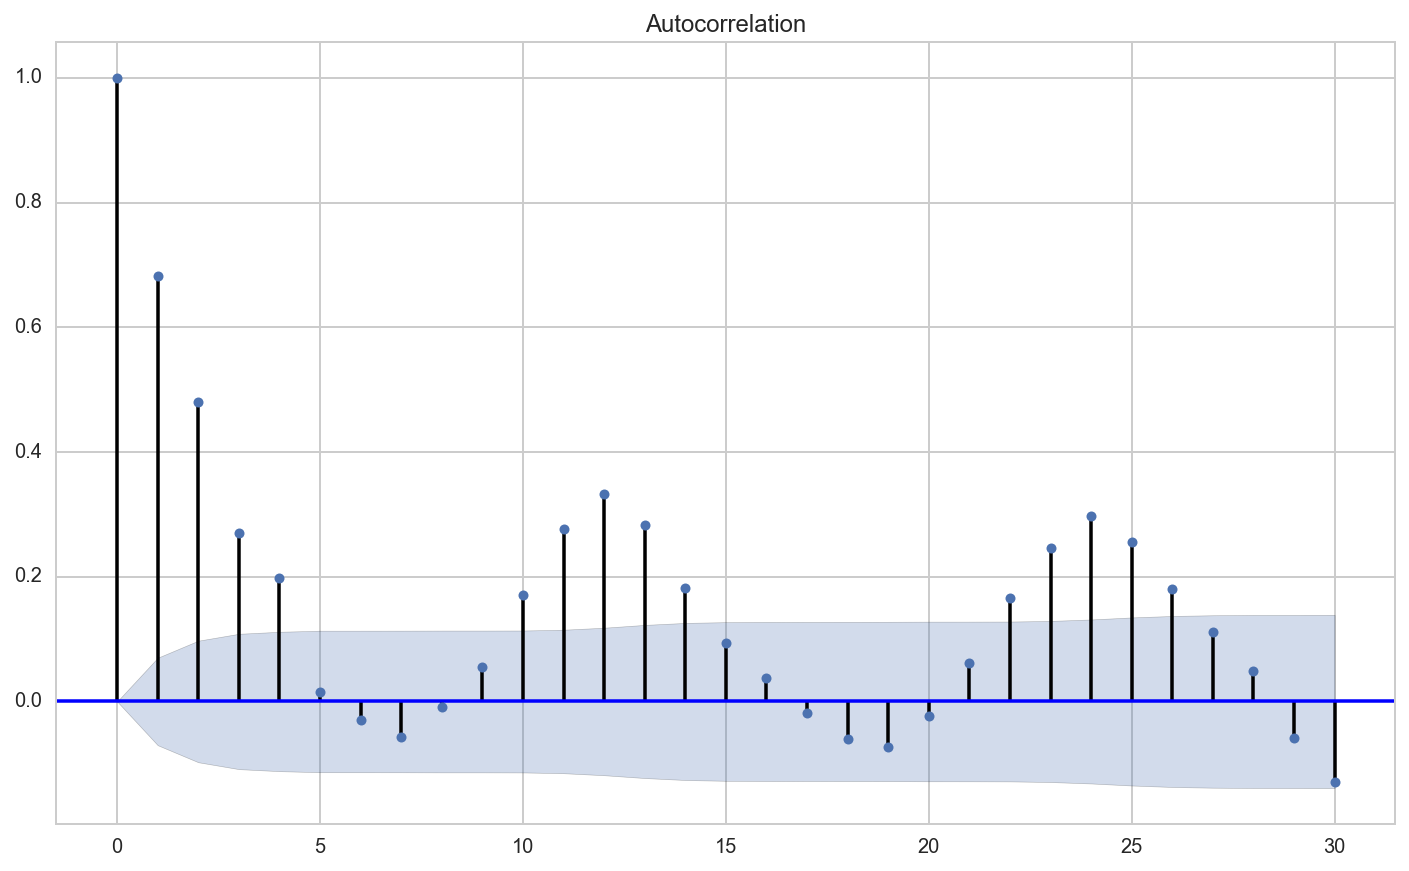

In [114]:
fig = plt.figure(figsize=(12,7))
ax = fig.gca()
plot_acf(s1['sales'].values, lags=30, ax=ax)
plt.show()